# DAY 4

## Linear Regression

### Simple Linear Regression

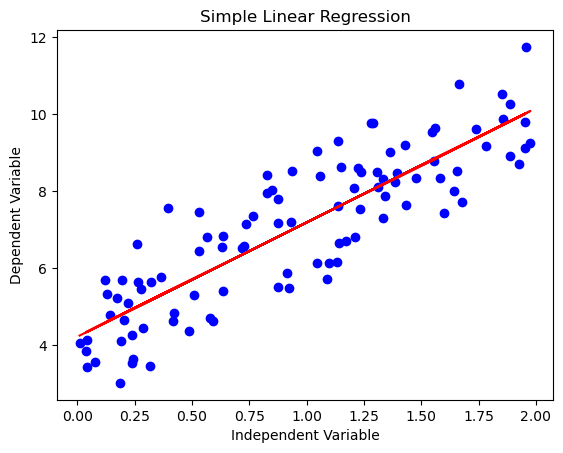

Intercept: 4.222151077447232
Slope: 2.968467510701018


In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)
# Create a linear regression model
model = LinearRegression()
model.fit(X, y)
# Predictions
y_pred =  model.predict(X)
# Plotting the results
plt.scatter(X, y, color='blue') 
plt.plot(X, y_pred, color='red') 
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Simple Linear Regression')
plt.show()
# Coefficients
print(f'Intercept: {model.intercept_[0]}') 
print (f'Slope: {model.coef_[0][0]}')

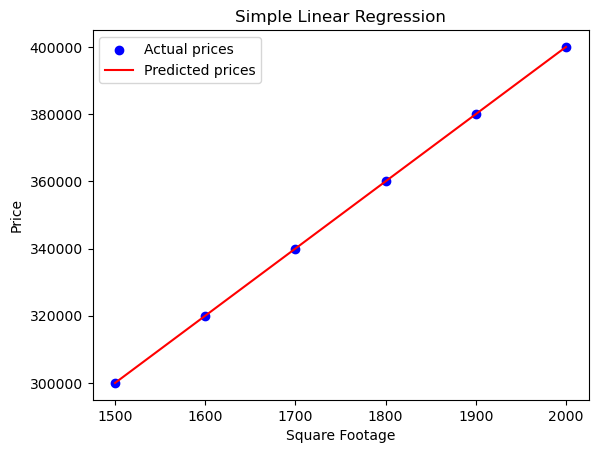

Intercept: 0.0
Slope: 200.0


In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
#Sample data: square footage and corresponding house prices
square_footage = np.array([1500, 1600, 1700, 1800, 1900, 2000]).reshape(-1, 1) 
prices = np.array([300000, 320000, 340000, 360000, 380000, 400000])
# Creating the linear regression model
model=LinearRegression()
model.fit(square_footage, prices)
#Making predictions
predicted_prices = model.predict(square_footage)
# Plotting
plt.scatter (square_footage, prices, color='blue', label='Actual prices')
plt.plot(square_footage, predicted_prices, color='red', label='Predicted prices')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()
# Outputting the coefficients
print (f'Intercept: {model.intercept_}') 
print (f'Slope: {model.coef_[0]}')

### MultiLinear Regression

In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
#Sample data: square footage, number of bedrooms, and corresponding house prices 
data = {
    'square_footage': [1500, 1600, 1700, 1800, 1900, 2000],
    'num_bedrooms': [3, 3, 3, 4, 4, 4],
    'prices': [300000, 320000, 340000, 360000, 380000, 400000]
}

df = pd.DataFrame(data)
# Defining the independent variables (X) and the dependent variable (y)
X = df[['square_footage', 'num_bedrooms']]
y= df['prices']
# Creating the linear regression model
model=LinearRegression()
model.fit(X, y)
#Making predictions
predicted_prices = model.predict(X)
# Outputting the coefficients 
print(f'Intercept: {model.intercept_}') 
print (f'Coefficients: {model.coef_}')

Intercept: 1.7462298274040222e-10
Coefficients: [2.00000000e+02 1.34923795e-12]


## Logistic Regression

Confusion Matrix: 
[[1 0]
 [0 1]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0


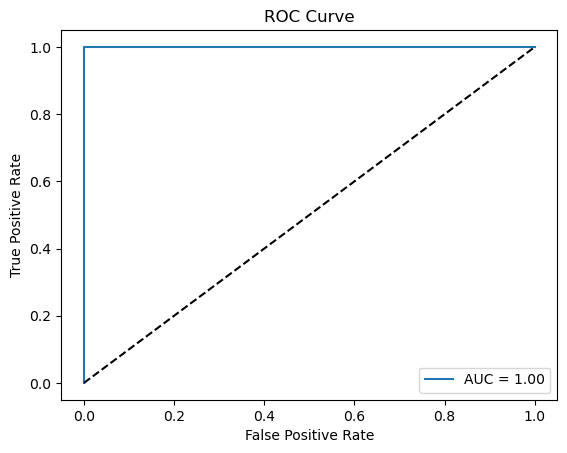

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

#Sample data
data = {
    'hours_studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'previous_score': [50, 55, 60, 65, 70, 75, 80, 85, 90, 95],
    'passed': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1] # 0: fail, 1: pass
}
df = pd.DataFrame(data)

# Defining the independent variables (X) and the dependent variable (y)
X = df[['hours_studied', 'previous_score']]
y = df['passed']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating the logistic regression model
model=LogisticRegression()
model.fit(X_train, y_train)

#Making predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

#Evaluating the model
conf_matrix = confusion_matrix (y_test, y_pred)
acc = accuracy_score (y_test, y_pred)
prec = precision_score (y_test, y_pred)
rec = recall_score (y_test, y_pred)
f1 = f1_score (y_test, y_pred)
roc_auc = roc_auc_score (y_test, y_pred_prob)
print (f'Confusion Matrix: \n{conf_matrix}')
print (f'Accuracy: {acc}')
print (f'Precision: {prec}') 
print (f'Recall: {rec}') 
print (f'F1 Score: {f1}') 
print (f'ROC AUC: {roc_auc}')
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve (y_test, y_pred_prob) 
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}') 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Decision Tree

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
Accuracy: 1.00


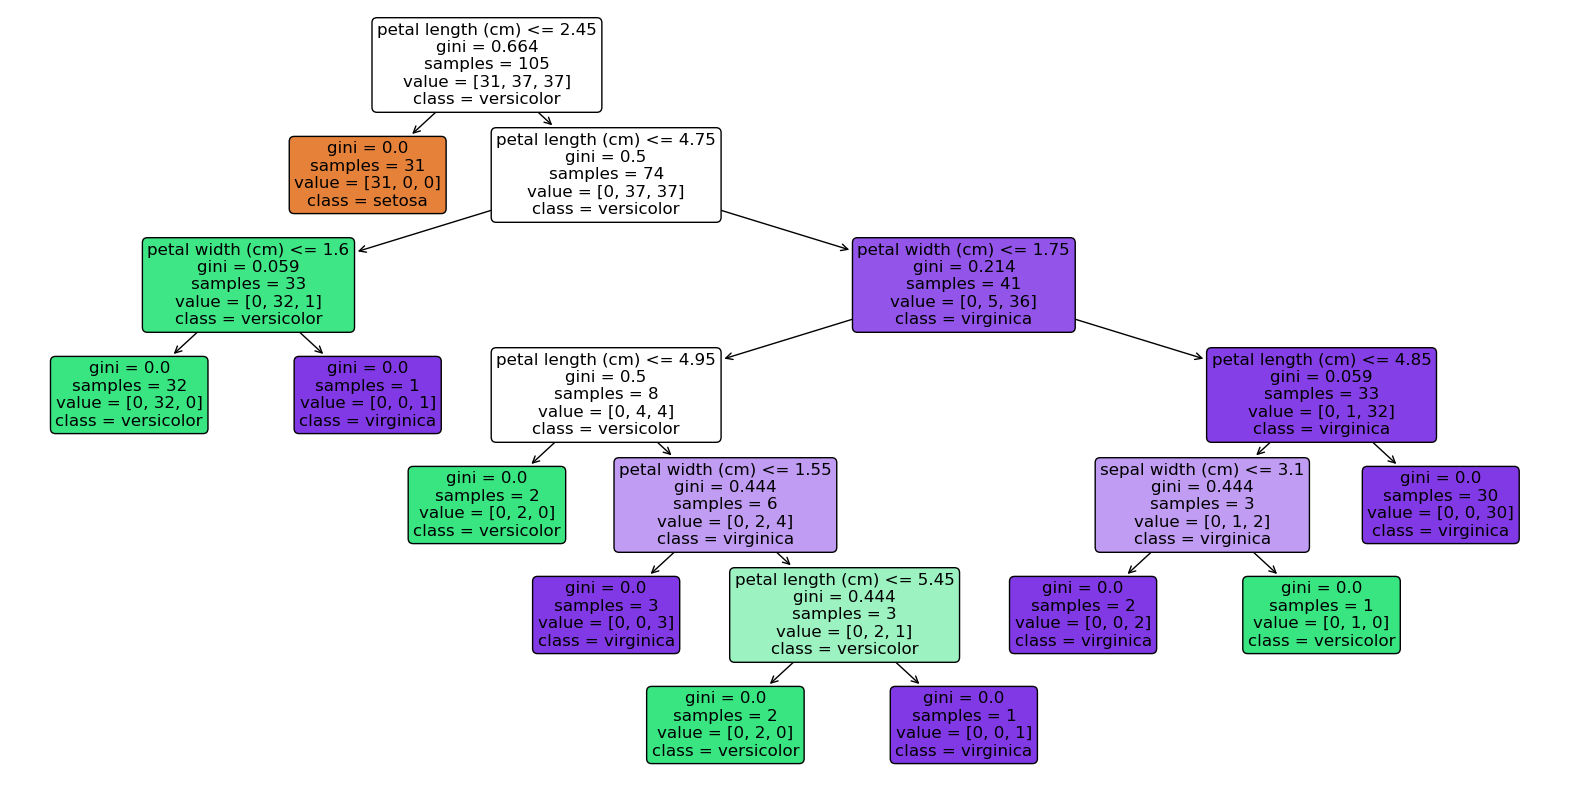

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree 
import matplotlib.pyplot as plt

#Load dataset
from sklearn.datasets import load_iris
data= load_iris()
X= data.data
y= data.target
print(X[:5])
print(y[:5])

#Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

#Train the model
clf.fit(X_train, y_train)

#Predict on the test set
y_pred = clf.predict(X_test)

#Evaluate the model
accuracy = np.mean(y_pred == y_test) 
print(f'Accuracy: {accuracy:.2f}')
                                            
#Visualize the tree using Matplotlib
plt.figure(figsize=(20,10))
plot_tree(clf, 
          feature_names=data.feature_names, 
          class_names=list(data.target_names),
          filled=True, 
          rounded=True, 
          fontsize=12) 
plt.show()

### Support Vector Machine

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


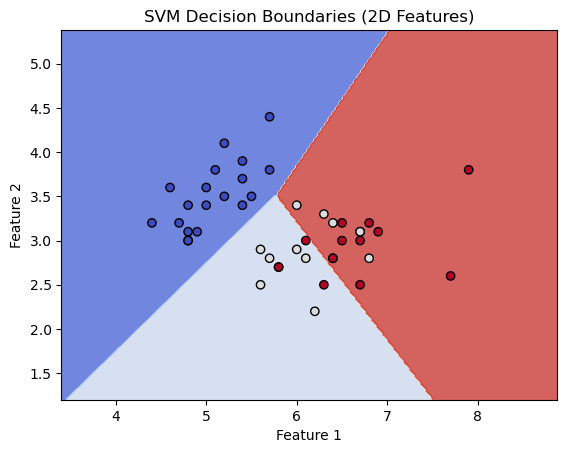

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

#Load dataset
data = datasets.load_iris()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier with a linear kernel
clf = SVC (kernel='linear', random_state=42)

#Train the model
clf.fit(X_train, y_train)

#Predict on the test set
y_pred = clf.predict(X_test)


# Predict on the test set
y_pred = clf.predict(X_test)

#Evaluate the model
accuracy = accuracy_score (y_test, y_pred)
print (f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=data.target_names)) 

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Plotting the decision boundaries for visualization (only for 2D data)
def plot_decision_boundaries(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

    
#Reduce the dataset to 20 for visualization purposes
X_reduced = X[:, :2]
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

#Train and plot
clf_reduced = SVC (kernel = 'linear', random_state=42)
clf_reduced.fit(X_train_reduced, y_train_reduced)
plot_decision_boundaries(X_test_reduced, y_test_reduced, clf_reduced,'SVM Decision Boundaries (2D Features)')